In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data into DataFrames
results = pd.read_csv('men_results.csv')
results.info()

# Convert date column to datetime
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
results

In [49]:
# Create a decade column and a total goals column
results['decade'] = results['date'].apply(lambda x: x.year//10*10)
results['year'] = results['date'].apply(lambda x: x.year)
results['total_goals'] = results['home_score'] + results['away_score']
results.drop('Unnamed: 0', axis=1, inplace=True)

array([1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970,
       1980, 1990, 2000, 2010, 2020], dtype=int64)

In [ ]:
# Dataframe with all the World Cups
world_cup = results[results['tournament'] == 'FIFA World Cup']['year'].unique()

<Axes: xlabel='decade'>

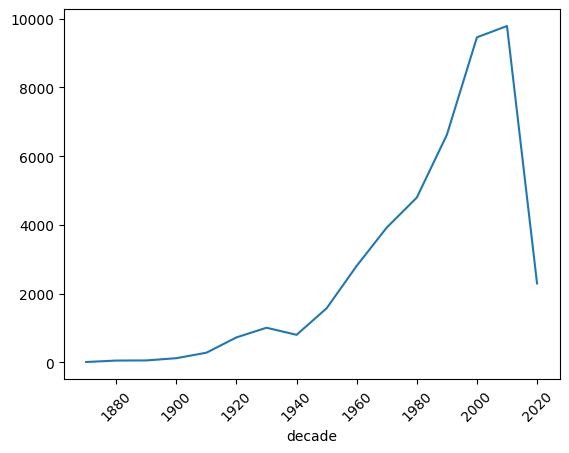

In [46]:
# Count number of matches per year
matches_count = results.groupby('year')['year'].count()

# Plot number of matches per year
plt.figure(figsize=(12, 6))

plt.axvline(x=1939, color='r', linestyle='dashed', linewidth=1, ymax=0.2)
plt.axvline(x=1945, color='r', linestyle='dashed', linewidth=1, ymax=0.2)
plt.text(1934, 200, 'World War II', color='red')

plt.plot(matches_count)
plt.scatter(world_cup, matches_count[world_cup], color='green', label='World Cup Year', s=20)
plt.xticks(np.arange(1870, 2024, 10))
plt.xlabel('Year')

plt.ylabel('Number of Matches')
plt.title('Number of Matches per Year')
plt.legend()
plt.text(2015, 250, 'COVID-19', color='red')
plt.show()

In [39]:
home_goals = results.groupby('decade')['home_score'].mean()
away_goals = results.groupby('decade')['away_score'].mean()

# Plot the average goals per decade for home and away teams
plt.plot(home_goals.index, home_goals.values)
plt.plot(away_goals.index, away_goals.values)
plt.ylabel('Average goals per match')
plt.xlabel('Decade')
plt.legend(['Home', 'Away'])
plt.show()

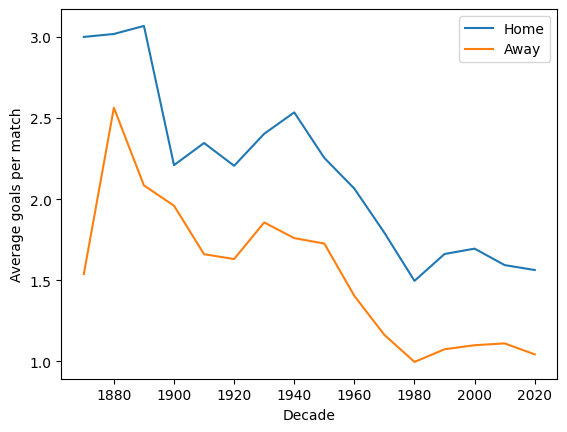

In [42]:
results['outcome'] = np.where(results['home_score'] > results['away_score'], 'Home Win', np.where(results['home_score'] < results['away_score'], 'Away Win', 'Draw'))
ax = results.groupby('decade')['outcome'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
ax.set_ylim(1, 0)
plt.show()

In [ ]:
# Count the number of games per tournament and decade
games_per_tournament = results.groupby(['tournament', 'decade']).size().reset_index(name='num_games')

# Get the top 10 tournaments by number of games
top_10_tournaments = games_per_tournament.groupby('tournament')['num_games'].sum().nlargest(10).index

# Filter the data to include only the top 10 tournaments
games_per_tournament_filtered = games_per_tournament[games_per_tournament['tournament'].isin(top_10_tournaments)]

# Pivot the data to have tournaments as columns
games_per_tournament_pivot = games_per_tournament_filtered.pivot(index='decade', columns='tournament', values='num_games')

# Plot the number of games per tournament
games_per_tournament_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Decade')
plt.ylabel('Number of Games')
plt.title('Number of Games per Tournament (Top 10)')
plt.legend(title='Tournament')
plt.show()